# Data wrangling

Etapas:
 * Selecionar os municipios do RJ
 * Selecionar as variaveis de interesse
 * Transformar os dados de formato wide para longer

In [ ]:
import pandas as pd

# IFGF

In [ ]:
# Carregar dados IFGF
df_ifgf = pd.read_excel('data/Evolucao_por_Indicador_2013_a_2022_IFGF_2023.xlsx', na_values=['nd'])
df_ifgf.head()

,Código,UF,Município,Ranking Estadual 2013,Ranking IFGF 2013,IFGF 2013,Ranking Estadual 2014,Ranking IFGF 2014,IFGF 2014,Ranking Estadual 2015,...,IFGF 2019,Ranking Estadual 2020,Ranking IFGF 2020,IFGF 2020,Ranking Estadual 2021,Ranking IFGF 2021,IFGF 2021,Ranking Estadual 2022,Ranking IFGF 2022,IFGF 2022
0,110001,RO,Alta Floresta D'Oeste,43.0,3592.0,0.352018,38.0,3130.0,0.414620,50.0,...,0.399236,46.0,3890.0,0.398531,40.0,3068.0,0.576309,17.0,1729.0,0.740788
1,110002,RO,Ariquemes,10.0,1557.0,0.585560,12.0,874.0,0.695704,12.0,...,0.667026,5.0,717.0,0.785016,24.0,2265.0,0.669156,29.0,2704.0,0.639816
2,110003,RO,Cabixi,14.0,1888.0,0.544989,14.0,1116.0,0.657589,2.0,...,0.733081,2.0,588.0,0.803779,3.0,642.0,0.837790,9.0,1167.0,0.797609
3,110004,RO,Cacoal,5.0,962.0,0.664375,4.0,419.0,0.778280,3.0,...,0.701052,4.0,702.0,0.786318,25.0,2279.0,0.667562,26.0,2575.0,0.653472
4,110005,RO,Cerejeiras,11.0,1611.0,0.579233,6.0,519.0,0.756226,13.0,...,0.543842,17.0,1896.0,0.636537,9.0,1340.0,0.761506,5.0,592.0,0.868550


Estratificar para  os municipios do Rio de janeiro

In [ ]:
# Filtrar apenas municípios do RJ
df_ifgf = df_ifgf.query ('UF == "RJ"').reset_index(drop=True)

Variaveis de interesse, delimitacao via regex considerar o valor do IFGV

In [ ]:
# Selecionar variáveis de interesse
df_ifgf = df_ifgf.filter(regex='^IFGF|Código|Município')

Empilhar dados

In [ ]:
# Transformar dados de wide para long (stack)
def convert_year(x):
    return x.split(' ')[-1]

df_ifgf_stack = df_ifgf.melt(id_vars=['Código', 'Município'], value_name='IFGF',var_name='Ano')
df_ifgf_stack['Ano'] = df_ifgf_stack['Ano'].apply(convert_year)
df_ifgf_stack

,Código,Município,Ano,IFGF
0,330010,Angra dos Reis,2013,0.289811
1,330015,Aperibé,2013,NaN
2,330020,Araruama,2013,0.335870
3,330022,Areal,2013,0.618364
4,330023,Armação dos Búzios,2013,0.420488
...,...,...,...,...
915,330600,Três Rios,2022,0.401953
916,330610,Valença,2022,0.584545
917,330615,Varre-Sai,2022,0.479002
918,330620,Vassouras,2022,0.560869


Classificar

In [9]:
# Função de classificação
def classificar_ifgf(valor):
    if valor >= 0.8:
        return 'Excelência'
    elif valor >= 0.6:
        return 'Boa Gestão'
    elif valor >= 0.4:
        return 'Dificuldade'
    else:
        return 'Crítica'
    
df_ifgf_stack['classificacao_ifgf'] = df_ifgf_stack['IFGF'].apply(classificar_ifgf)

df_ifgf_stack

,Código,Município,Ano,IFGF,classificacao_ifgf
0,330010,Angra dos Reis,2013,0.289811,Crítica
1,330015,Aperibé,2013,NaN,Crítica
2,330020,Araruama,2013,0.335870,Crítica
3,330022,Areal,2013,0.618364,Boa Gestão
4,330023,Armação dos Búzios,2013,0.420488,Dificuldade
...,...,...,...,...,...
915,330600,Três Rios,2022,0.401953,Dificuldade
916,330610,Valença,2022,0.584545,Dificuldade
917,330615,Varre-Sai,2022,0.479002,Dificuldade
918,330620,Vassouras,2022,0.560869,Dificuldade


# IFDM

In [ ]:
# Carregar dados IFDM
df_ifdm = pd.read_excel('data/Serie-Historica-IFDM-2013-a-2023.xlsx', na_values=['nd'])
df_ifdm.head()

,COD_MUNIC,SIGLA_UF,NOME_MUNIC,Ranking Estadual IFDM 2013,Ranking IFDM 2013,IFDM 2013,Ranking Estadual IFDM 2014,Ranking IFDM 2014,IFDM 2014,Ranking Estadual IFDM 2015,...,IFDM 2020,Ranking Estadual IFDM 2021,Ranking IFDM 2021,IFDM 2021,Ranking Estadual IFDM 2022,Ranking IFDM 2022,IFDM 2022,Ranking Estadual IFDM 2023,Ranking IFDM 2023,IFDM 2023
0,110001,RO,Alta Floresta D'Oeste,31,3472,0.405,28,3258,0.4469,39,...,0.5143,29,3002,0.5411,24,2949,0.5722,30,3472,0.5647
1,110002,RO,Ariquemes,5,1548,0.5724,5,1691,0.5718,6,...,0.619,8,1747,0.6312,12,2062,0.6323,8,1656,0.682
2,110003,RO,Cabixi,21,2971,0.4495,37,3583,0.4168,22,...,0.5068,24,2810,0.5549,15,2301,0.6177,22,2980,0.5965
3,110004,RO,Cacoal,1,1195,0.6041,1,836,0.6484,2,...,0.6731,1,801,0.7067,1,831,0.7216,1,920,0.7331
4,110005,RO,Cerejeiras,11,2468,0.4926,24,3030,0.4651,8,...,0.5606,12,2160,0.6023,16,2339,0.6157,15,2043,0.6577


Filtrar municípios do RJ e selecionar variáveis de interesse do IFDM.

In [ ]:
df_ifdm = df_ifdm.query ('SIGLA_UF == "RJ"').reset_index(drop=True)

Selecionar variáveis de interesse do IFDM.

In [ ]:
df_ifdm = df_ifdm.filter(regex='^IFDM|COD_MUNIC|NOME_MUNIC')

Transformar dados IFDM de wide para long.

In [39]:
# Transformar dados de wide para long (stack)
df_ifdm_stack = df_ifdm.melt(id_vars=['COD_MUNIC', 'NOME_MUNIC'], value_name='IFDM',var_name='Ano')
df_ifdm_stack['Ano'] = df_ifdm_stack['Ano'].apply(convert_year)
df_ifdm_stack = df_ifdm_stack.rename(columns={'COD_MUNIC': 'Código'})
df_ifdm_stack

,Código,NOME_MUNIC,Ano,IFDM
0,330010,Angra dos Reis,2013,0.6387
1,330015,Aperibé,2013,0.5717
2,330020,Araruama,2013,0.533
3,330022,Areal,2013,0.6244
4,330023,Armação dos Búzios,2013,0.6004
...,...,...,...,...
1007,330600,Três Rios,2023,0.6908
1008,330610,Valença,2023,0.6561
1009,330615,Varre-Sai,2023,0.5276
1010,330620,Vassouras,2023,0.6851


Classificar

In [40]:
# Função de classificação
def classificar_ifgf(valor):
    if valor >= 0.8:
        return 'Alto'
    elif valor >= 0.6:
        return 'Moderado'
    elif valor >= 0.4:
        return 'Baixo'
    else:
        return 'Crítico'
    
df_ifdm_stack['ND'] = df_ifdm_stack['IFDM'].apply(classificar_ifgf)

df_ifdm_stack

,Código,NOME_MUNIC,Ano,IFDM,ND
0,330010,Angra dos Reis,2013,0.6387,Moderado
1,330015,Aperibé,2013,0.5717,Baixo
2,330020,Araruama,2013,0.533,Baixo
3,330022,Areal,2013,0.6244,Moderado
4,330023,Armação dos Búzios,2013,0.6004,Moderado
...,...,...,...,...,...
1007,330600,Três Rios,2023,0.6908,Moderado
1008,330610,Valença,2023,0.6561,Moderado
1009,330615,Varre-Sai,2023,0.5276,Baixo
1010,330620,Vassouras,2023,0.6851,Moderado


# Consolidar os dados

In [44]:
df = df_ifgf_stack.merge(
    df_ifdm_stack,
    on=['Código', 'Ano'],
).drop('NOME_MUNIC', axis=1)

df

,Código,Município,Ano,IFGF,classificacao_ifgf,IFDM,ND
0,330010,Angra dos Reis,2013,0.289811,Crítica,0.6387,Moderado
1,330015,Aperibé,2013,NaN,Crítica,0.5717,Baixo
2,330020,Araruama,2013,0.335870,Crítica,0.533,Baixo
3,330022,Areal,2013,0.618364,Boa Gestão,0.6244,Moderado
4,330023,Armação dos Búzios,2013,0.420488,Dificuldade,0.6004,Moderado
...,...,...,...,...,...,...,...
915,330600,Três Rios,2022,0.401953,Dificuldade,0.6544,Moderado
916,330610,Valença,2022,0.584545,Dificuldade,0.6525,Moderado
917,330615,Varre-Sai,2022,0.479002,Dificuldade,0.5032,Baixo
918,330620,Vassouras,2022,0.560869,Dificuldade,0.6649,Moderado


# Visualizacao

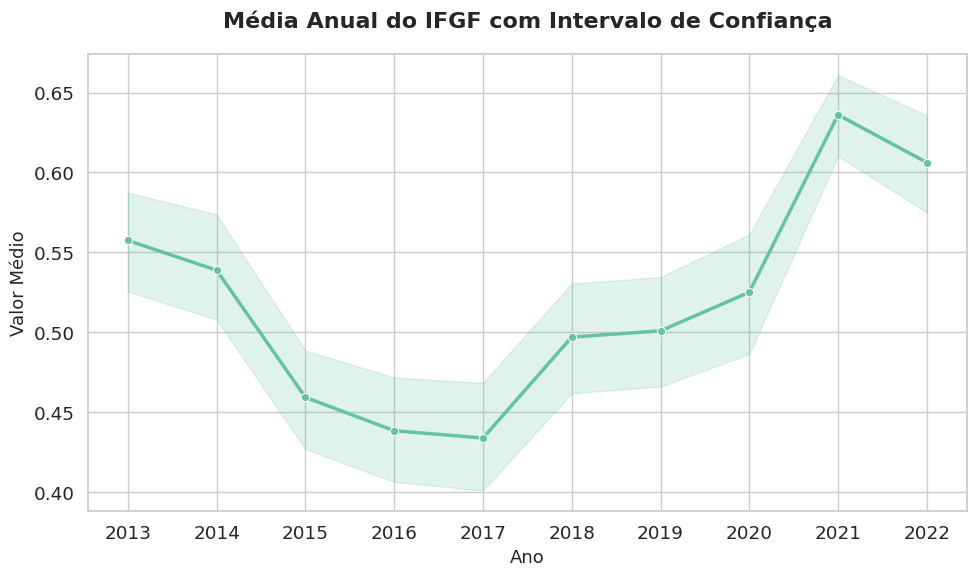

In [ ]:
# Visualização: linha média anual IFGF
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar tema elegante
sns.set_theme(style='whitegrid', palette='Set2', font_scale=1.2)

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=df_ifgf_stack,
    x='Ano',
    y='IFGF',
    errorbar=('ci', 95),
    linewidth=2.5,
    marker='o',
)

# Título e eixos
ax.set_title("Média Anual do IFGF com Intervalo de Confiança", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Ano", fontsize=13)
ax.set_ylabel("Valor Médio", fontsize=13)

# Remover linhas desnecessárias (bordas superiores e laterais)
# sns.despine()

# Melhorar espaçamento
plt.tight_layout()

plt.show()

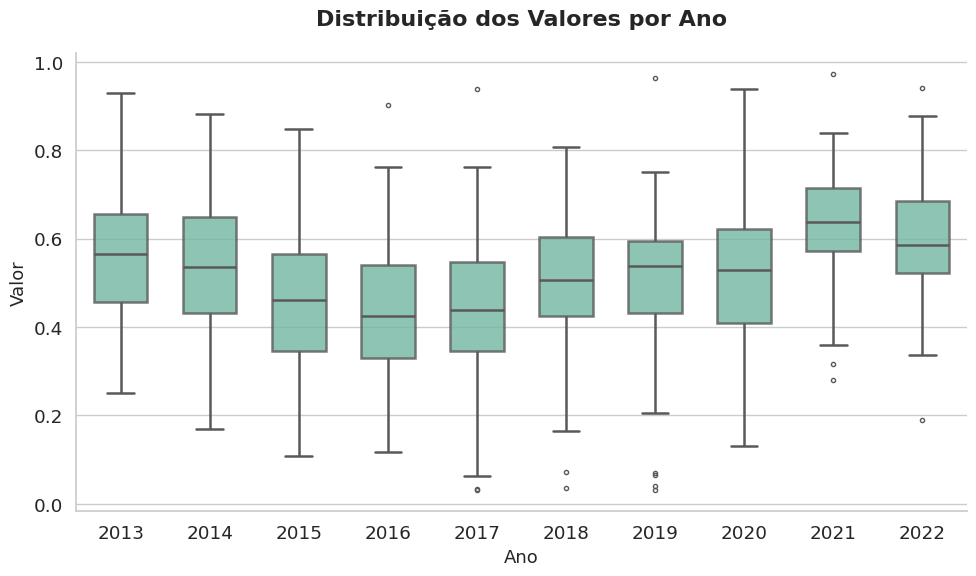

In [ ]:
# Visualização: boxplot IFGF por ano
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar tema e configurações
sns.set_theme(style='whitegrid', palette='Set2', font_scale=1.2)

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o boxplot
ax = sns.boxplot(
    data=df_ifgf_stack,
    x='Ano',       # ou 'tempo'
    y='IFGF',
    width=0.6,
    linewidth=1.8,
    fliersize=3,   # tamanho dos outliers
    boxprops=dict(alpha=0.8)
)

# Título e rótulos
ax.set_title("Distribuição dos Valores por Ano", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Ano", fontsize=13)
ax.set_ylabel("Valor", fontsize=13)

# Remover bordas desnecessárias
sns.despine()

# Ajustar espaçamento
plt.tight_layout()
plt.show()